C:\Users\Legion\AppData\Local\Temp\ipykernel_10992\4264895408.py:7: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('processed_data.csv')


Phân tích sơ bộ:
Tổng số chuyến bay: 2244644
Số lượng chuyến bay theo hãng:
operating_airline_name
VietNam Airlines    1164507
Vietjet Air         1055964
BAMBOO AIRWAYS        23790
Name: count, dtype: int64

Thống kê giá vé (VND) theo hãng:
                             min         max          mean
operating_airline_name                                    
BAMBOO AIRWAYS          983000.0  11740000.0  4.074105e+06
VietNam Airlines        892000.0  15921000.0  6.353131e+06
Vietjet Air             441335.0   8292540.0  3.008404e+06
Thuế trung bình (VND) theo hãng:
operating_airline_name
BAMBOO AIRWAYS      1.061373e+06
VietNam Airlines    1.315122e+06
Vietjet Air         6.160177e+05
Name: taxes, dtype: float64
Tổng thuế (VND) theo hãng:
operating_airline_name
BAMBOO AIRWAYS      2.525005e+10
VietNam Airlines    1.531469e+12
Vietjet Air         6.504925e+11
Name: taxes, dtype: float64


C:\Users\Legion\AppData\Local\Temp\ipykernel_10992\4264895408.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='operating_airline_name', y='price_vnd', data=data, palette=['#FF9999', '#66B2FF', '#99FF99'])


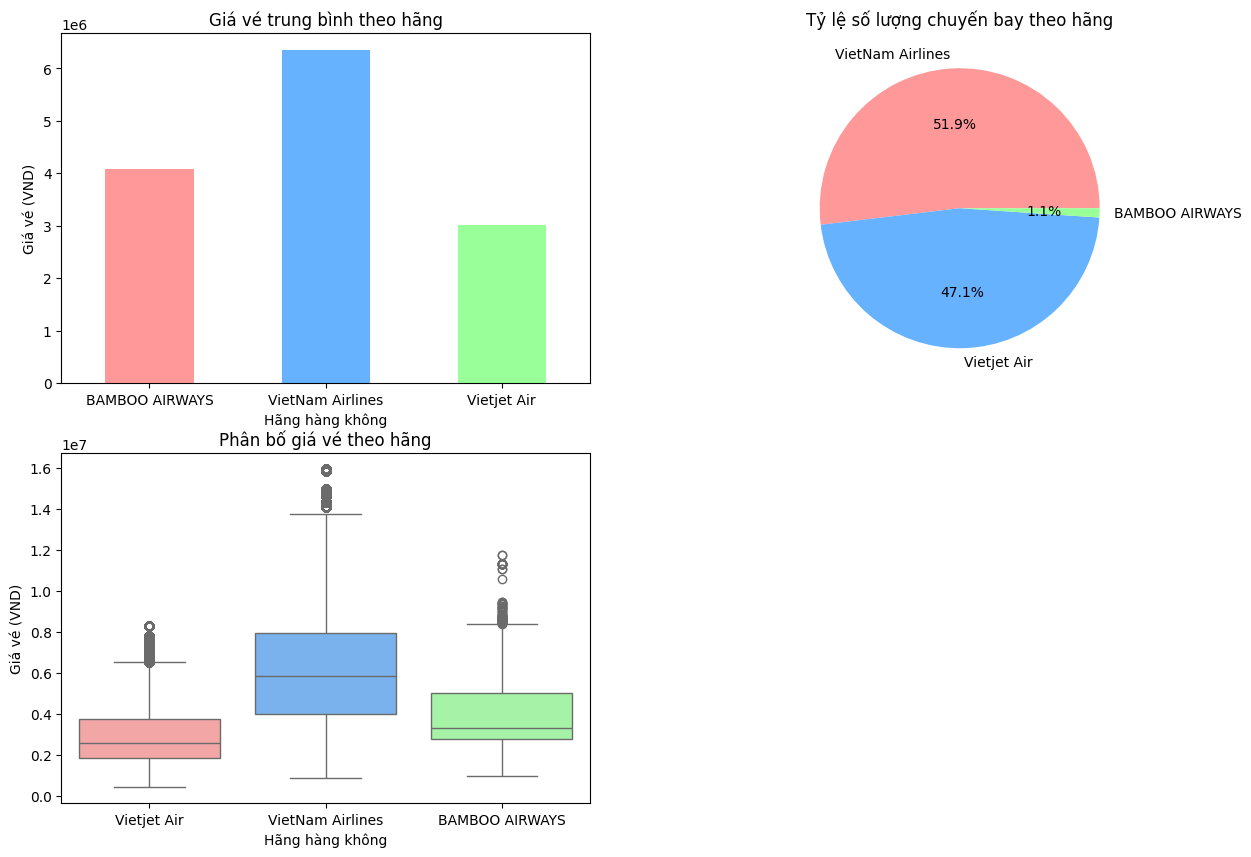

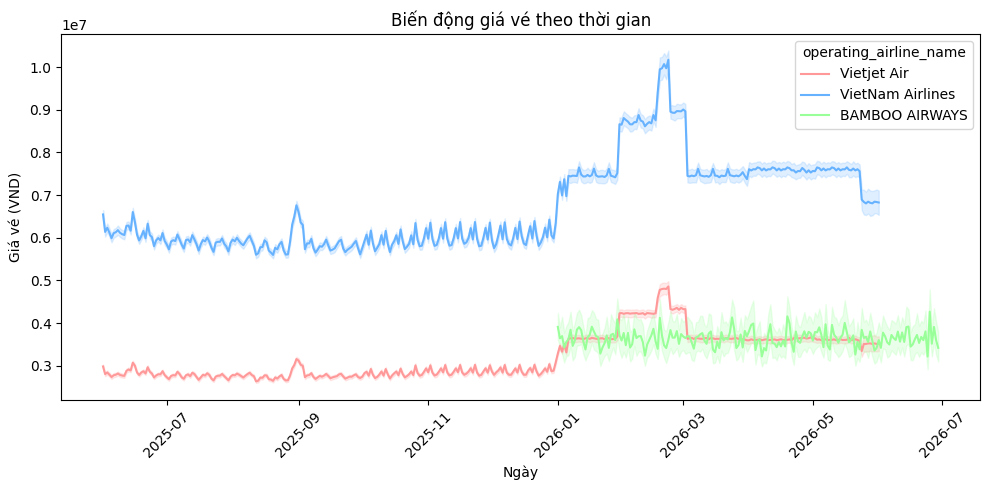

<Figure size 640x480 with 0 Axes>

In [2]:
# Import các thư viện cần thiết
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ file CSV
data = pd.read_csv('processed_data.csv')

# Đảm bảo tên cột đồng nhất (chuyển thành lowercase)
data.columns = data.columns.str.lower()

# Phân tích sơ bộ dữ liệu chuyến bay
print("Phân tích sơ bộ:")
print(f"Tổng số chuyến bay: {len(data)}")
airline_counts = data['operating_airline_name'].value_counts()
print("Số lượng chuyến bay theo hãng:")
print(airline_counts)

avg_price = data.groupby('operating_airline_name')['price_vnd'].mean()
avg_taxes = data.groupby('operating_airline_name')['taxes'].mean()
total_taxes = data.groupby('operating_airline_name')['taxes'].sum()
price_stats = data.groupby('operating_airline_name')['price_vnd'].agg(['min', 'max', 'mean'])
print("\nThống kê giá vé (VND) theo hãng:")
print(price_stats)
print("Thuế trung bình (VND) theo hãng:")
print(avg_taxes)
print("Tổng thuế (VND) theo hãng:")
print(total_taxes)

# Trực quan hóa dữ liệu chuyến bay
plt.figure(figsize=(15, 10))

# 1. Biểu đồ cột: Giá vé trung bình theo hãng
plt.subplot(2, 2, 1)
avg_price.plot(kind='bar', color=['#FF9999', '#66B2FF', '#99FF99'])
plt.title('Giá vé trung bình theo hãng')
plt.xlabel('Hãng hàng không')
plt.ylabel('Giá vé (VND)')
plt.xticks(rotation=0)

# 2. Biểu đồ tròn: Số lượng chuyến bay theo hãng
plt.subplot(2, 2, 2)
airline_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#FF9999', '#66B2FF', '#99FF99'])
plt.title('Tỷ lệ số lượng chuyến bay theo hãng')
plt.ylabel('')

# 3. Biểu đồ hộp: Phân bố giá vé theo hãng
plt.subplot(2, 2, 3)
sns.boxplot(x='operating_airline_name', y='price_vnd', data=data, palette=['#FF9999', '#66B2FF', '#99FF99'])
plt.title('Phân bố giá vé theo hãng')
plt.xlabel('Hãng hàng không')
plt.ylabel('Giá vé (VND)')

# 4. Biểu đồ đường: Giá vé theo thời gian (nếu có cột date)
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')  # Cập nhật định dạng
    plt.figure(figsize=(10, 5))
    sns.lineplot(x='date', y='price_vnd', hue='operating_airline_name', data=data, palette=['#FF9999', '#66B2FF', '#99FF99'])
    plt.title('Biến động giá vé theo thời gian')
    plt.xlabel('Ngày')
    plt.ylabel('Giá vé (VND)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plt.tight_layout()
plt.show()